In [15]:
import pandas as pd
import matplotlib.pyplot as plt

Here, we are checking if:
* TSM and SPM are the same [SPM = STS (suspendert tørrstoff)].
* POC computation is possible.
* We can use DOC instead of TOC.
**Note from Leah:** "If we have almost as much DOC data as TOC, drop TOC and just use DOC."

### 1. User input

In [36]:
df = pd.read_csv('../../data/river/water_chem/cleaned_niva/dremmen_glomma_numed_wc_flagged_2024_cleaned.csv')
df

,sample_date,station_id,station_code,station_name,DOC_mg/L C,outlier_DOC_mg/L C,Farge_mg Pt/l,outlier_Farge_mg Pt/l,NH4-N_µg/l,outlier_NH4-N_µg/l,...,TOTN_µg/l,outlier_TOTN_µg/l,TOTP/F_µg/l P,outlier_TOTP/F_µg/l P,TOTP_P_µg/l P,outlier_TOTP_P_µg/l P,TSM_mg/l,outlier_TSM_mg/l,UV-Abs. 410nm_Abs/cm,outlier_UV-Abs. 410nm_Abs/cm
0,1990-01-11,40352,DRA1,Drammenselva v/Krokstadelva,NaN,NaN,NaN,NaN,NaN,NaN,...,350.0,False,NaN,NaN,NaN,NaN,0.80,False,NaN,NaN
1,1990-02-12,40352,DRA1,Drammenselva v/Krokstadelva,NaN,NaN,NaN,NaN,NaN,NaN,...,419.0,False,NaN,NaN,NaN,NaN,2.00,False,NaN,NaN
2,1990-03-13,40352,DRA1,Drammenselva v/Krokstadelva,NaN,NaN,NaN,NaN,NaN,NaN,...,405.0,False,NaN,NaN,NaN,NaN,1.40,False,NaN,NaN
3,1990-04-18,40352,DRA1,Drammenselva v/Krokstadelva,NaN,NaN,NaN,NaN,NaN,NaN,...,399.0,False,NaN,NaN,NaN,NaN,1.30,False,NaN,NaN
4,1990-05-21,40352,DRA1,Drammenselva v/Krokstadelva,NaN,NaN,NaN,NaN,NaN,NaN,...,317.0,False,NaN,NaN,NaN,NaN,1.70,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1624,2024-05-22,40356,GLO1,Glomma v/Sarpefossen,3.8,False,27.0,False,10.0,False,...,320.0,False,NaN,NaN,8.7,False,7.29,False,NaN,NaN
1625,2024-06-03,40356,GLO1,Glomma v/Sarpefossen,3.0,False,19.0,False,8.0,False,...,420.0,False,NaN,NaN,7.8,False,4.42,False,NaN,NaN
1626,2024-06-12,40356,GLO1,Glomma v/Sarpefossen,3.0,False,17.0,False,13.0,False,...,480.0,False,NaN,NaN,9.0,False,1.00,False,NaN,NaN
1627,2024-06-20,40356,GLO1,Glomma v/Sarpefossen,3.8,False,24.0,False,9.0,False,...,470.0,False,NaN,NaN,8.5,False,4.63,False,NaN,NaN


In [37]:
df.keys()

Index(['sample_date', 'station_id', 'station_code', 'station_name',
       'DOC_mg/L C', 'outlier_DOC_mg/L C', 'Farge_mg Pt/l',
       'outlier_Farge_mg Pt/l', 'NH4-N_µg/l', 'outlier_NH4-N_µg/l',
       'NO3-N_µg/l', 'outlier_NO3-N_µg/l', 'PO4-P_µg/l', 'outlier_PO4-P_µg/l',
       'STS_mg/l', 'outlier_STS_mg/l', 'SiO2_mg/l', 'outlier_SiO2_mg/l',
       'TOC_mg/l', 'outlier_TOC_mg/l', 'TOTN_µg/l', 'outlier_TOTN_µg/l',
       'TOTP/F_µg/l P', 'outlier_TOTP/F_µg/l P', 'TOTP_P_µg/l P',
       'outlier_TOTP_P_µg/l P', 'TSM_mg/l', 'outlier_TSM_mg/l',
       'UV-Abs. 410nm_Abs/cm', 'outlier_UV-Abs. 410nm_Abs/cm'],
      dtype='object')

### 2. TSM vs STS

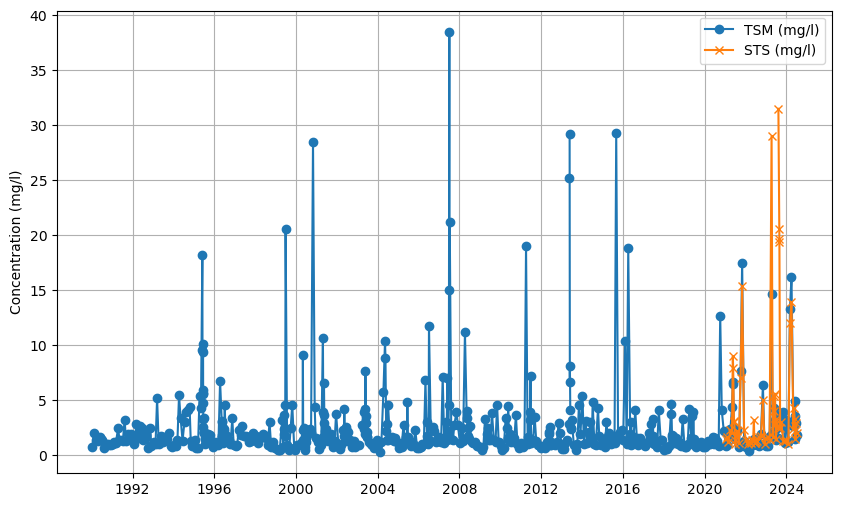

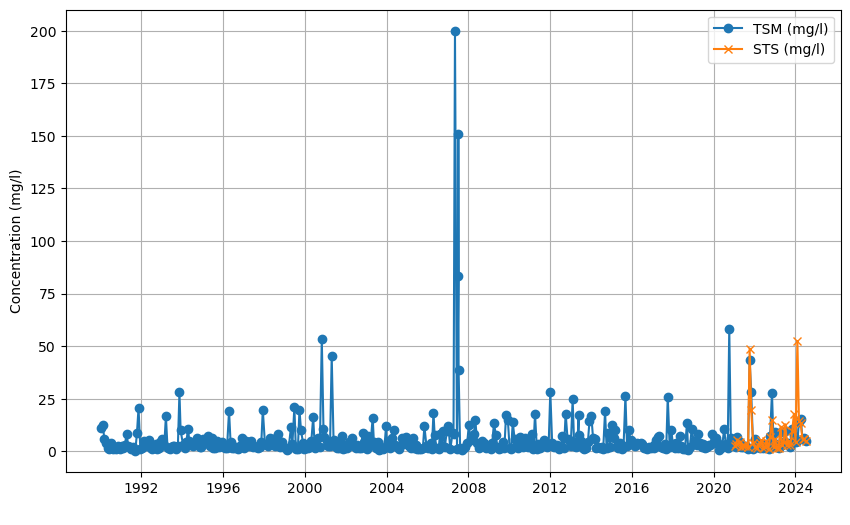

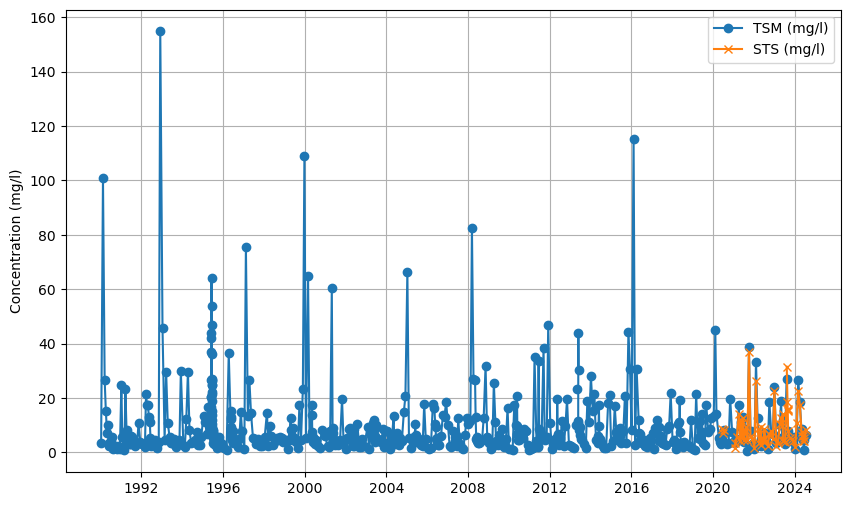

In [17]:
# Convert sample_date to datetime
df['sample_date'] = pd.to_datetime(df['sample_date'])

# Plot TSM and STS for each station separately
stations = df['station_code'].unique()

for station in stations:
    station_df = df[df['station_code'] == station]
    
    plt.figure(figsize=(10,6))
    plt.plot(station_df['sample_date'], station_df['TSM_mg/l'], label='TSM (mg/l)', marker='o')
    plt.plot(station_df['sample_date'], station_df['STS_mg/l'], label='STS (mg/l)', marker='x')
    
    plt.xlabel(' ')
    plt.ylabel('Concentration (mg/l)')
    plt.legend()
    plt.grid(True)
    plt.show()

**Øyvind:** The main difference between the methods is that STS uses "regular" glass fiber filters: GF/C (0.45 µm), and the weighing of the filters takes place on a "regular" analytical weight that weighs grams with 4 (or maybe 5) decimal places. TSM uses nucleopore capillary filters, which have smaller pore size (0.2 µm? - not confirmed with the lab!) than the glass fiber filters. Filters are weighed on a micro-weight, which measures the weight in milligrams with several decimal places. In principle, TSM values should be higher than STS due to smaller filter pore size.

### 3. DOC vs TOC

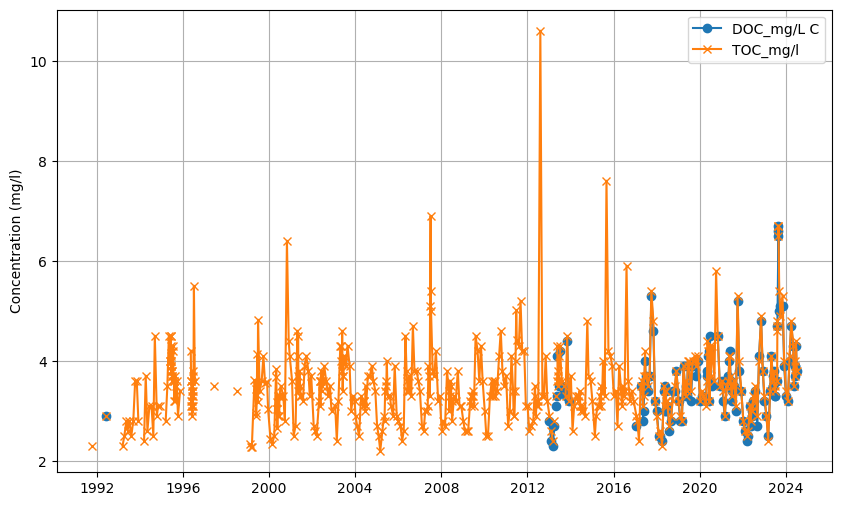

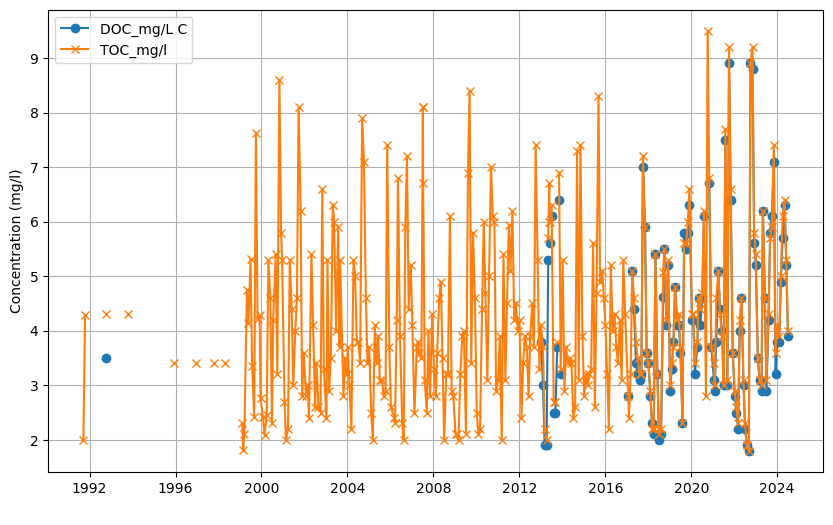

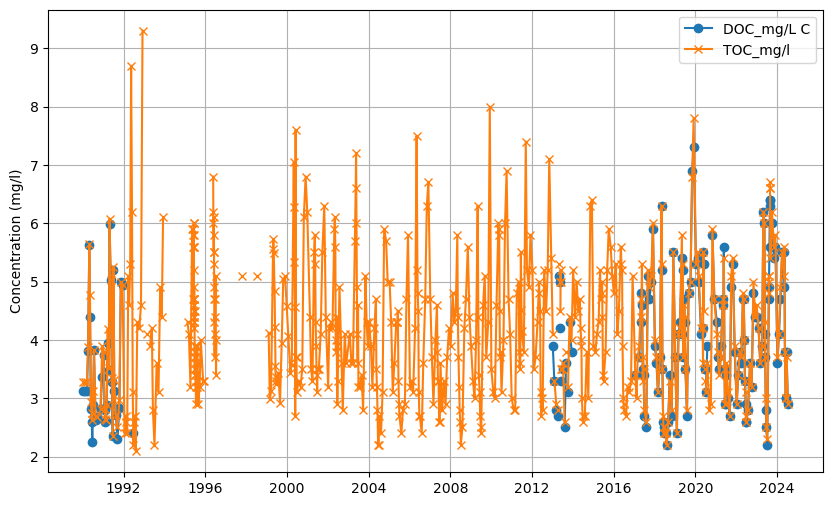

In [18]:
for station in stations:
    station_df = df[df['station_code'] == station]
    
    plt.figure(figsize=(10,6))
    plt.plot(station_df['sample_date'], station_df['DOC_mg/L C'], label='DOC_mg/L C', marker='o')
    plt.plot(station_df['sample_date'], station_df['TOC_mg/l'], label='TOC_mg/l', marker='x')
    
    plt.xlabel(' ')
    plt.ylabel('Concentration (mg/l)')
    plt.legend()
    plt.grid(True)
    plt.show()

**Note from Leah:** Looks like DOC basically == TOC in all rivers and that POC is really low. Could you quickly work out the average ratio between DOC and TOC and make a note of it for all 3 rivers? Then lets justify how low that is for assuming that TOC = DOC and just using TOC (given it has a longer and more continuous series).

In [19]:
df['DOC/TOC'] = df['DOC_mg/L C'] / df['TOC_mg/l']
df

,sample_date,station_id,station_code,station_name,DOC_mg/L C,outlier_DOC_mg/L C,Farge_mg Pt/l,outlier_Farge_mg Pt/l,NH4-N_µg/l,outlier_NH4-N_µg/l,...,outlier_TOTN_µg/l,TOTP/F_µg/l P,outlier_TOTP/F_µg/l P,TOTP_P_µg/l P,outlier_TOTP_P_µg/l P,TSM_mg/l,outlier_TSM_mg/l,UV-Abs. 410nm_Abs/cm,outlier_UV-Abs. 410nm_Abs/cm,DOC/TOC
0,1990-01-11,40352,DRA1,Drammenselva v/Krokstadelva,NaN,NaN,NaN,NaN,NaN,NaN,...,False,NaN,NaN,NaN,NaN,0.80,False,NaN,NaN,NaN
1,1990-02-12,40352,DRA1,Drammenselva v/Krokstadelva,NaN,NaN,NaN,NaN,NaN,NaN,...,False,NaN,NaN,NaN,NaN,2.00,False,NaN,NaN,NaN
2,1990-03-13,40352,DRA1,Drammenselva v/Krokstadelva,NaN,NaN,NaN,NaN,NaN,NaN,...,False,NaN,NaN,NaN,NaN,1.40,False,NaN,NaN,NaN
3,1990-04-18,40352,DRA1,Drammenselva v/Krokstadelva,NaN,NaN,NaN,NaN,NaN,NaN,...,False,NaN,NaN,NaN,NaN,1.30,False,NaN,NaN,NaN
4,1990-05-21,40352,DRA1,Drammenselva v/Krokstadelva,NaN,NaN,NaN,NaN,NaN,NaN,...,False,NaN,NaN,NaN,NaN,1.70,False,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1624,2024-05-22,40356,GLO1,Glomma v/Sarpefossen,3.8,False,27.0,False,10.0,False,...,False,NaN,NaN,8.7,False,7.29,False,NaN,NaN,1.000000
1625,2024-06-03,40356,GLO1,Glomma v/Sarpefossen,3.0,False,19.0,False,8.0,False,...,False,NaN,NaN,7.8,False,4.42,False,NaN,NaN,1.000000
1626,2024-06-12,40356,GLO1,Glomma v/Sarpefossen,3.0,False,17.0,False,13.0,False,...,False,NaN,NaN,9.0,False,1.00,False,NaN,NaN,1.000000
1627,2024-06-20,40356,GLO1,Glomma v/Sarpefossen,3.8,False,24.0,False,9.0,False,...,False,NaN,NaN,8.5,False,4.63,False,NaN,NaN,1.027027


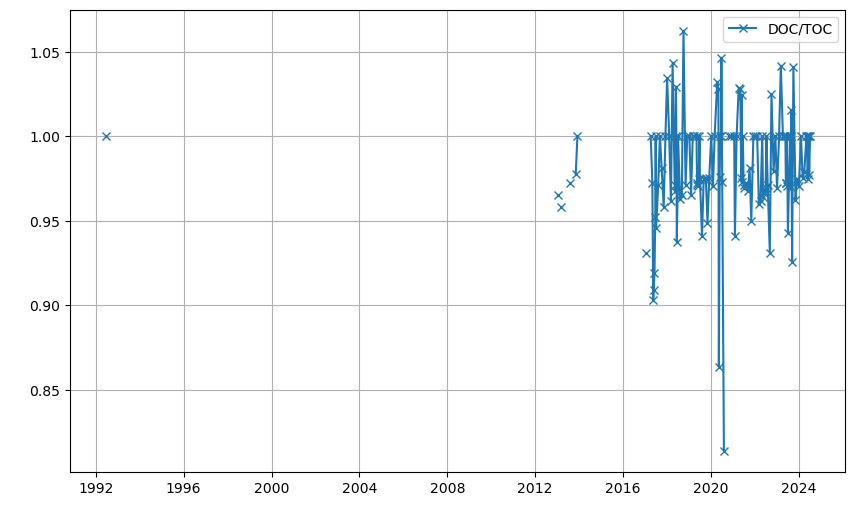

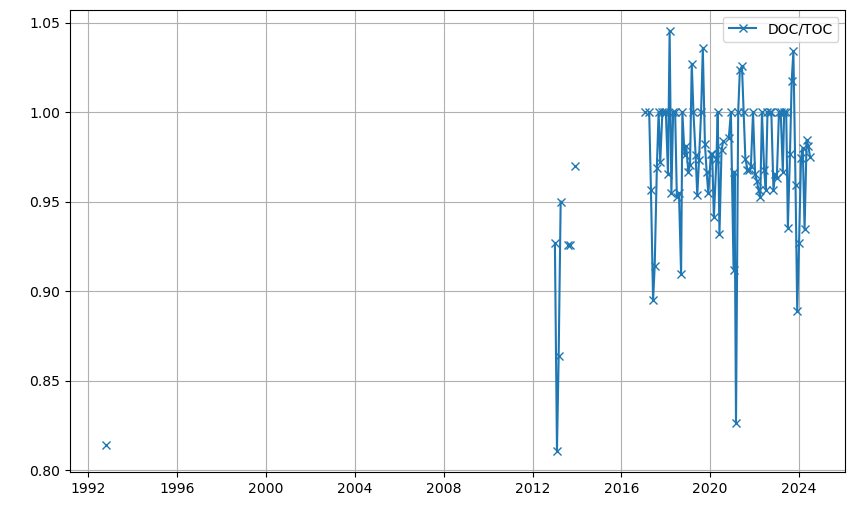

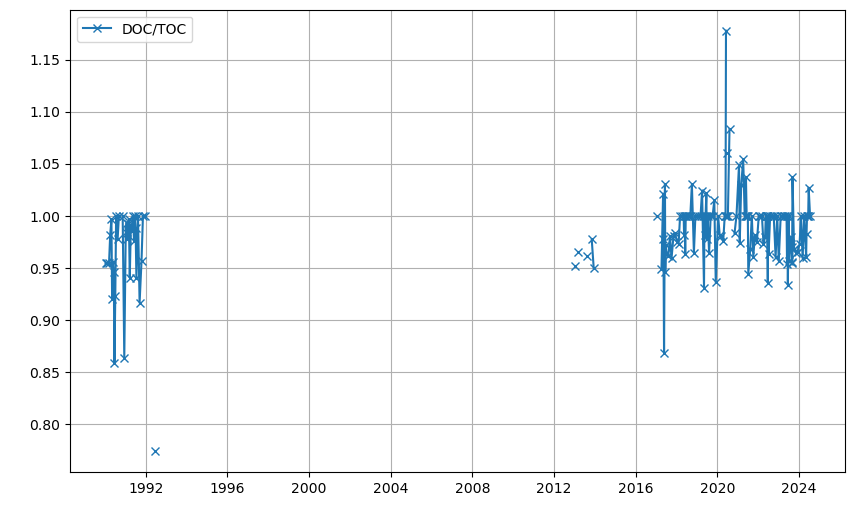

In [20]:
for station in stations:
    station_df = df[df['station_code'] == station]
    
    plt.figure(figsize=(10,6))
    plt.plot(station_df['sample_date'], station_df['DOC/TOC'], label='DOC/TOC', marker='x')
    
    plt.xlabel(' ')
    plt.ylabel(' ')
    plt.legend()
    plt.grid(True)
    plt.show()

In [21]:
ratios = df.groupby('station_code')['DOC/TOC'].mean().reset_index()
ratios

,station_code,DOC/TOC
0,DRA1,0.981463
1,GLO1,0.983455
2,NUM1,0.968407


### 4. Compute POC

In [22]:
df['POC_mg/l'] = df['TOC_mg/l'] - df['DOC_mg/L C']

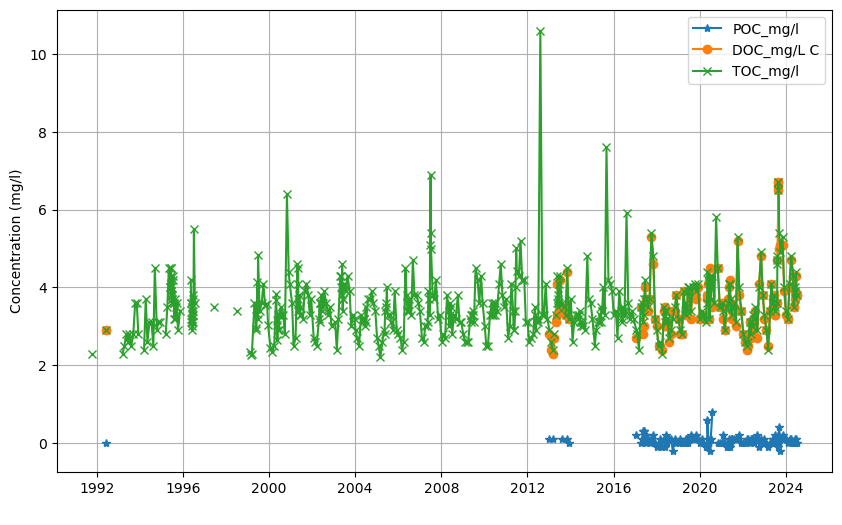

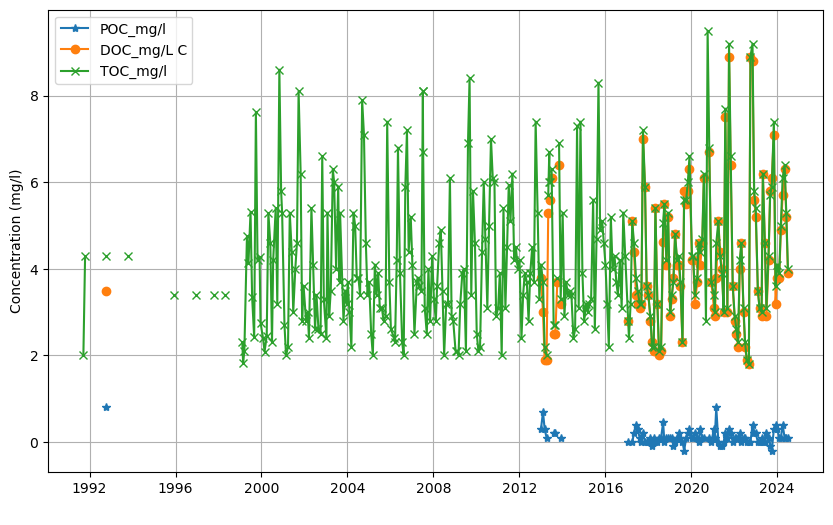

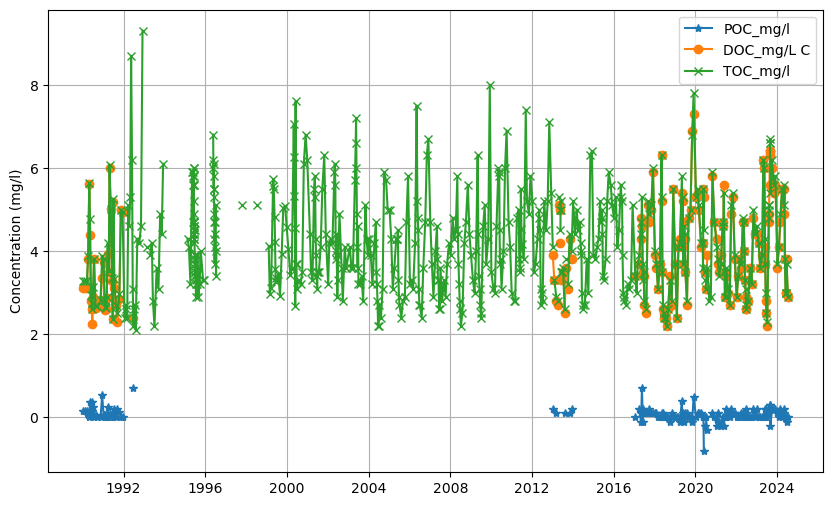

In [23]:
for station in stations:
    station_df = df[df['station_code'] == station]
    
    plt.figure(figsize=(10,6))
    plt.plot(station_df['sample_date'], station_df['POC_mg/l'], label='POC_mg/l', marker='*')
    plt.plot(station_df['sample_date'], station_df['DOC_mg/L C'], label='DOC_mg/L C', marker='o')
    plt.plot(station_df['sample_date'], station_df['TOC_mg/l'], label='TOC_mg/l', marker='x')
    
    plt.xlabel(' ')
    plt.ylabel('Concentration (mg/l)')
    plt.legend()
    plt.grid(True)
    plt.show()

The negative values in POC are not reasonable. We could replace the negative values with zeros, but we can mainly explore the dynamics only after 2017.

### 5. TOTP vs TOTP/F

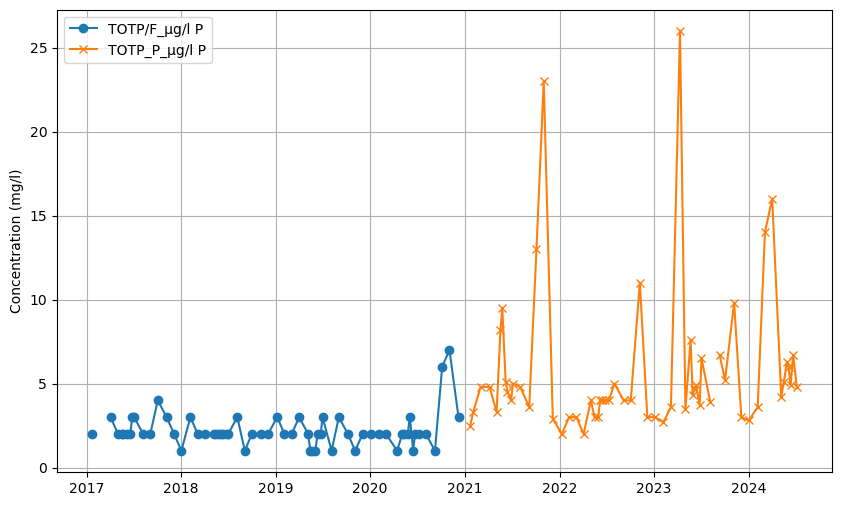

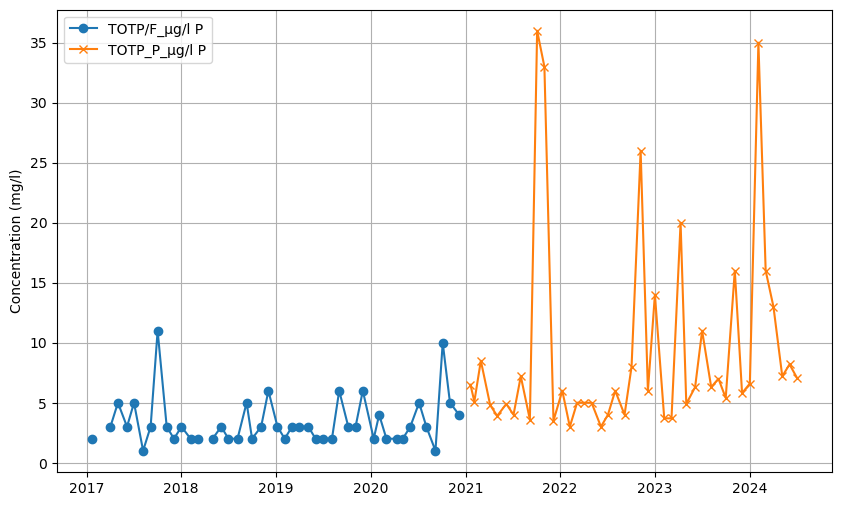

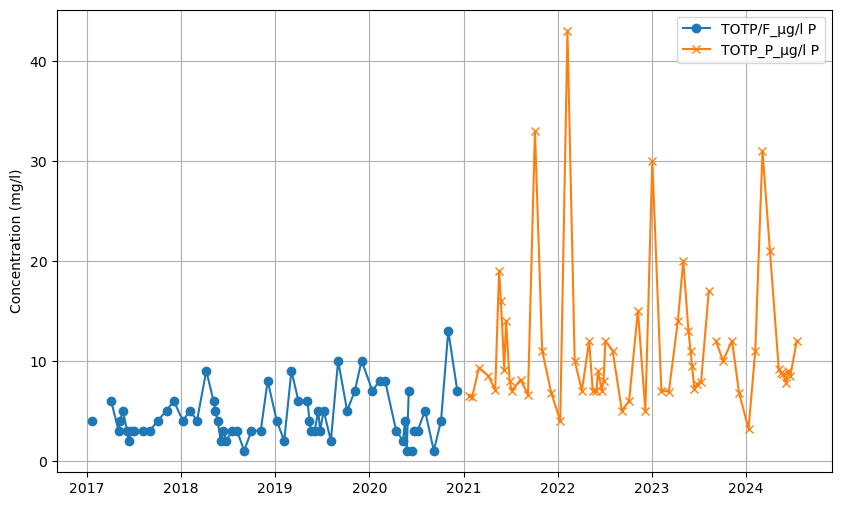

In [24]:
for station in stations:
    station_df = df[df['station_code'] == station]
    
    plt.figure(figsize=(10,6))
    plt.plot(station_df['sample_date'], station_df['TOTP/F_µg/l P'], label='TOTP/F_µg/l P', marker='o')
    plt.plot(station_df['sample_date'], station_df['TOTP_P_µg/l P'], label='TOTP_P_µg/l P', marker='x')
    
    plt.xlabel(' ')
    plt.ylabel('Concentration (mg/l)')
    plt.legend()
    plt.grid(True)
    plt.show()

**Note:** It seems that only "TOTP/F_µg/l P" can be considered as TDP. "TOTP_µg/l P" is clearly not filtered. 

### 6. CDOM and FDOM: UVAbs 410 nm 
for starters, just to see how much data there is? We can let Helene know there are other wavelengths available too.

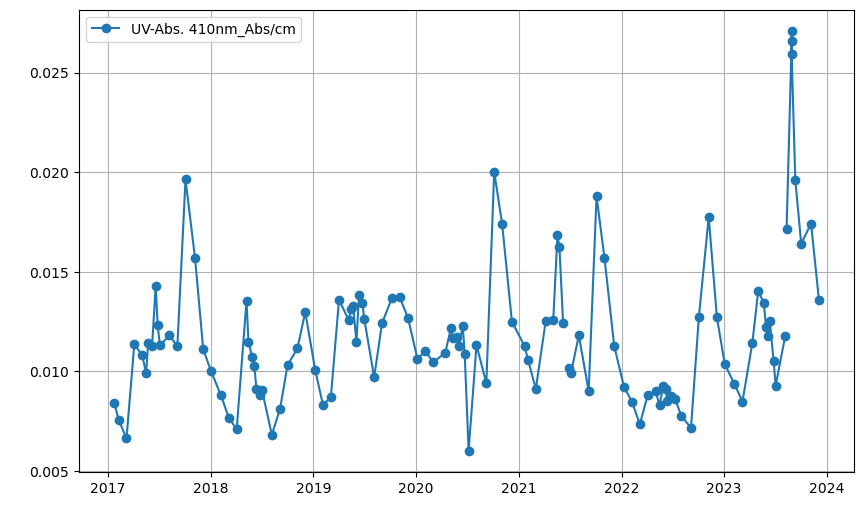

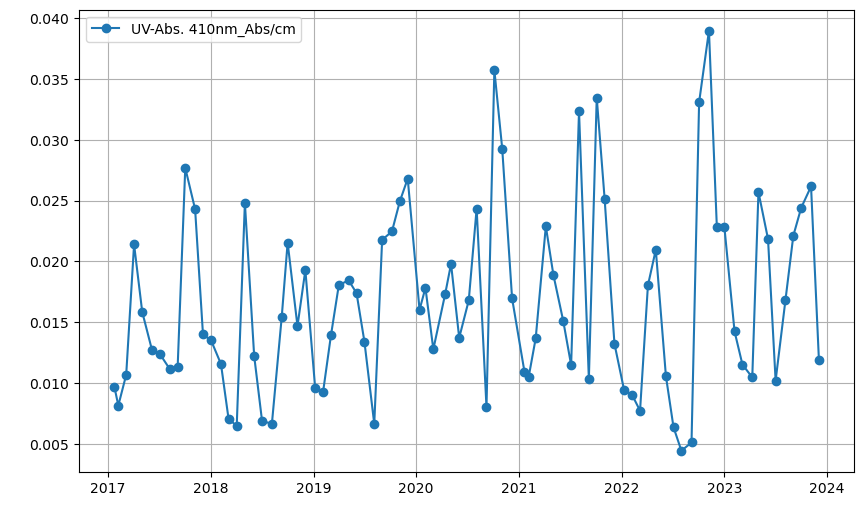

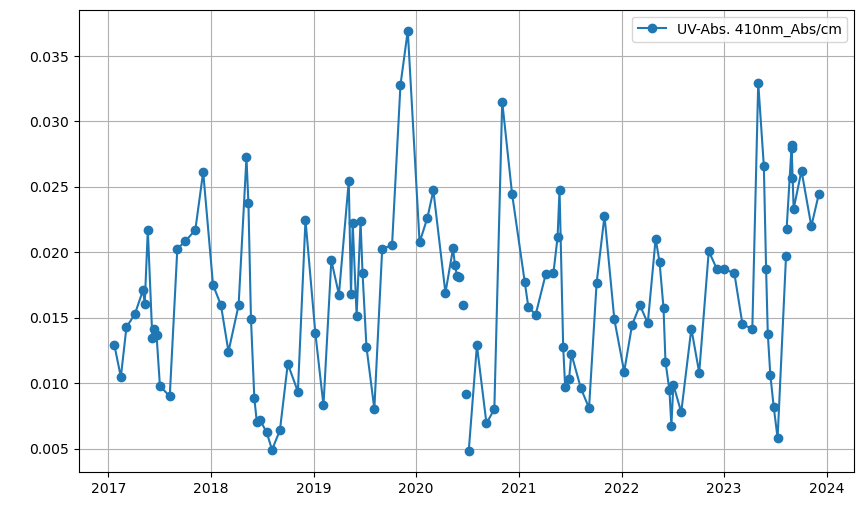

In [25]:
for station in stations:
    station_df = df[df['station_code'] == station]
    
    plt.figure(figsize=(10,6))
    plt.plot(station_df['sample_date'], station_df['UV-Abs. 410nm_Abs/cm'], label='UV-Abs. 410nm_Abs/cm', marker='o')
    
    plt.xlabel(' ')
    plt.ylabel(' ')
    plt.legend()
    plt.grid(True)
    plt.show()

**Note form Leah:** The main reason to  look at UV-Abs is to quality control the CDOM data. Hopefully there is an extremely good correlation with UV-Abs! If not, then one or the other is dodgy... So it's fine if we only have data after 2017. We're not interested in fluxes of UV-Abs to the fjord.

In [30]:
sensor_df = pd.read_csv("../../data/river/sensors/daily_glomma_sensor_data_2024-08-28_cleaned_manualy.csv")
sensor_df = sensor_df.drop('Unnamed: 0', axis=1)
sensor_df['Date'] = pd.to_datetime(sensor_df['Date'])
sensor_df.set_index('Date', inplace=True)
sensor_df

,CDOMdigitalFinal (µg/L),PhValue_Avg (-),Temp_water_Avg (degC),CondValue_Avg (µS/cm),Turbidity_Avg (NTU),Salinity_Avg (-)
Date,,,,,,
2023-02-02,76.000,NaN,0.0900,35.350,8.1700,0.0190
2023-02-03,75.430,7.5330,0.0595,34.580,8.1200,0.0190
2023-02-04,74.765,7.3875,0.0300,33.615,8.8900,0.0180
2023-02-05,74.645,7.2770,0.0635,32.585,7.8885,0.0170
2023-02-06,73.385,7.2950,0.1325,32.685,6.1120,0.0180
...,...,...,...,...,...,...
2024-08-23,51.360,6.6650,15.5200,21.560,5.9050,0.0115
2024-08-24,52.270,6.6455,14.7050,25.045,10.8700,0.0130
2024-08-25,53.950,6.6485,14.4950,23.850,9.6700,0.0130


In [31]:
glo1_df = df[df['station_code'] == 'GLO1']
glo1_df['sample_date'] = pd.to_datetime(glo1_df['sample_date'])
glo1_df.set_index('sample_date', inplace=True)
glo1_df

/tmp/ipykernel_400/4286305717.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  glo1_df['sample_date'] = pd.to_datetime(glo1_df['sample_date'])


,station_id,station_code,station_name,DOC_mg/L C,outlier_DOC_mg/L C,Farge_mg Pt/l,outlier_Farge_mg Pt/l,NH4-N_µg/l,outlier_NH4-N_µg/l,NO3-N_µg/l,...,TOTP/F_µg/l P,outlier_TOTP/F_µg/l P,TOTP_P_µg/l P,outlier_TOTP_P_µg/l P,TSM_mg/l,outlier_TSM_mg/l,UV-Abs. 410nm_Abs/cm,outlier_UV-Abs. 410nm_Abs/cm,DOC/TOC,POC_mg/l
sample_date,,,,,,,,,,,,,,,,,,,,,
1990-01-10,40356,GLO1,Glomma v/Sarpefossen,3.12,False,NaN,NaN,NaN,NaN,365.0,...,NaN,NaN,NaN,NaN,3.50,False,NaN,NaN,0.954128,0.15
1990-02-12,40356,GLO1,Glomma v/Sarpefossen,3.12,False,NaN,NaN,NaN,NaN,505.0,...,NaN,NaN,NaN,NaN,100.80,True,NaN,NaN,0.954128,0.15
1990-03-14,40356,GLO1,Glomma v/Sarpefossen,3.12,False,NaN,NaN,NaN,NaN,435.0,...,NaN,NaN,NaN,NaN,26.80,False,NaN,NaN,0.954128,0.15
1990-04-04,40356,GLO1,Glomma v/Sarpefossen,3.81,False,NaN,NaN,NaN,NaN,440.0,...,NaN,NaN,NaN,NaN,15.30,False,NaN,NaN,0.981959,0.07
1990-04-26,40356,GLO1,Glomma v/Sarpefossen,5.62,False,NaN,NaN,NaN,NaN,375.0,...,NaN,NaN,NaN,NaN,7.10,False,NaN,NaN,0.996454,0.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-22,40356,GLO1,Glomma v/Sarpefossen,3.80,False,27.0,False,10.0,False,180.0,...,NaN,NaN,8.7,False,7.29,False,NaN,NaN,1.000000,0.00
2024-06-03,40356,GLO1,Glomma v/Sarpefossen,3.00,False,19.0,False,8.0,False,290.0,...,NaN,NaN,7.8,False,4.42,False,NaN,NaN,1.000000,0.00
2024-06-12,40356,GLO1,Glomma v/Sarpefossen,3.00,False,17.0,False,13.0,False,330.0,...,NaN,NaN,9.0,False,1.00,False,NaN,NaN,1.000000,0.00


In [32]:
merged_df = pd.merge(sensor_df, glo1_df, left_index=True, right_index=True, how='inner')
merged_df

,CDOMdigitalFinal (µg/L),PhValue_Avg (-),Temp_water_Avg (degC),CondValue_Avg (µS/cm),Turbidity_Avg (NTU),Salinity_Avg (-),station_id,station_code,station_name,DOC_mg/L C,...,TOTP/F_µg/l P,outlier_TOTP/F_µg/l P,TOTP_P_µg/l P,outlier_TOTP_P_µg/l P,TSM_mg/l,outlier_TSM_mg/l,UV-Abs. 410nm_Abs/cm,outlier_UV-Abs. 410nm_Abs/cm,DOC/TOC,POC_mg/l
2023-02-06,73.385,7.2950,0.1325,32.685,6.1120,0.0180,40356,GLO1,Glomma v/Sarpefossen,4.2,...,NaN,NaN,7.0,False,3.56,False,0.018394,False,1.000000,0.0
2023-03-07,60.425,7.3010,0.3850,40.065,9.0450,0.0210,40356,GLO1,Glomma v/Sarpefossen,3.6,...,NaN,NaN,6.9,False,5.04,False,0.014486,False,1.000000,0.0
2023-04-11,57.580,7.0975,3.1395,49.215,16.9250,0.0260,40356,GLO1,Glomma v/Sarpefossen,3.9,...,NaN,NaN,14.0,False,9.96,False,0.014138,False,1.000000,0.0
2023-05-02,87.100,6.7215,4.3035,41.890,22.2600,0.0220,40356,GLO1,Glomma v/Sarpefossen,6.2,...,NaN,NaN,20.0,False,19.00,False,0.032936,False,1.000000,0.0
2023-05-22,81.650,6.0940,8.0650,29.050,12.1200,0.0160,40356,GLO1,Glomma v/Sarpefossen,6.0,...,NaN,NaN,13.0,False,4.60,False,0.026580,False,1.000000,0.0
2023-05-30,60.410,6.2595,9.1550,30.755,8.9650,0.0160,40356,GLO1,Glomma v/Sarpefossen,4.1,...,NaN,NaN,11.0,False,11.90,False,0.018744,False,0.953488,0.2
2023-06-05,54.160,6.3840,10.3550,34.245,5.0805,0.0180,40356,GLO1,Glomma v/Sarpefossen,3.7,...,NaN,NaN,9.5,False,5.52,False,0.013788,False,1.000000,0.0
2023-06-14,37.475,6.4595,14.8400,38.800,5.0670,0.0210,40356,GLO1,Glomma v/Sarpefossen,2.8,...,NaN,NaN,7.2,False,4.15,False,0.010650,False,0.933333,0.2
2023-06-26,28.675,6.4945,17.7650,40.335,5.9105,0.0220,40356,GLO1,Glomma v/Sarpefossen,2.5,...,NaN,NaN,7.7,False,4.49,False,0.008192,False,1.000000,0.0
2023-07-10,25.960,6.5365,17.6650,37.625,4.9975,0.0200,40356,GLO1,Glomma v/Sarpefossen,2.2,...,NaN,NaN,7.9,False,3.21,False,0.005808,False,0.956522,0.1


In [33]:
merged_df.keys()

Index(['CDOMdigitalFinal (µg/L)', 'PhValue_Avg (-)', 'Temp_water_Avg (degC)',
       'CondValue_Avg (µS/cm)', 'Turbidity_Avg (NTU)', 'Salinity_Avg (-)',
       'station_id', 'station_code', 'station_name', 'DOC_mg/L C',
       'outlier_DOC_mg/L C', 'Farge_mg Pt/l', 'outlier_Farge_mg Pt/l',
       'NH4-N_µg/l', 'outlier_NH4-N_µg/l', 'NO3-N_µg/l', 'outlier_NO3-N_µg/l',
       'PO4-P_µg/l', 'outlier_PO4-P_µg/l', 'STS_mg/l', 'outlier_STS_mg/l',
       'SiO2_mg/l', 'outlier_SiO2_mg/l', 'TOC_mg/l', 'outlier_TOC_mg/l',
       'TOTN_µg/l', 'outlier_TOTN_µg/l', 'TOTP/F_µg/l P',
       'outlier_TOTP/F_µg/l P', 'TOTP_P_µg/l P', 'outlier_TOTP_P_µg/l P',
       'TSM_mg/l', 'outlier_TSM_mg/l', 'UV-Abs. 410nm_Abs/cm',
       'outlier_UV-Abs. 410nm_Abs/cm', 'DOC/TOC', 'POC_mg/l'],
      dtype='object')

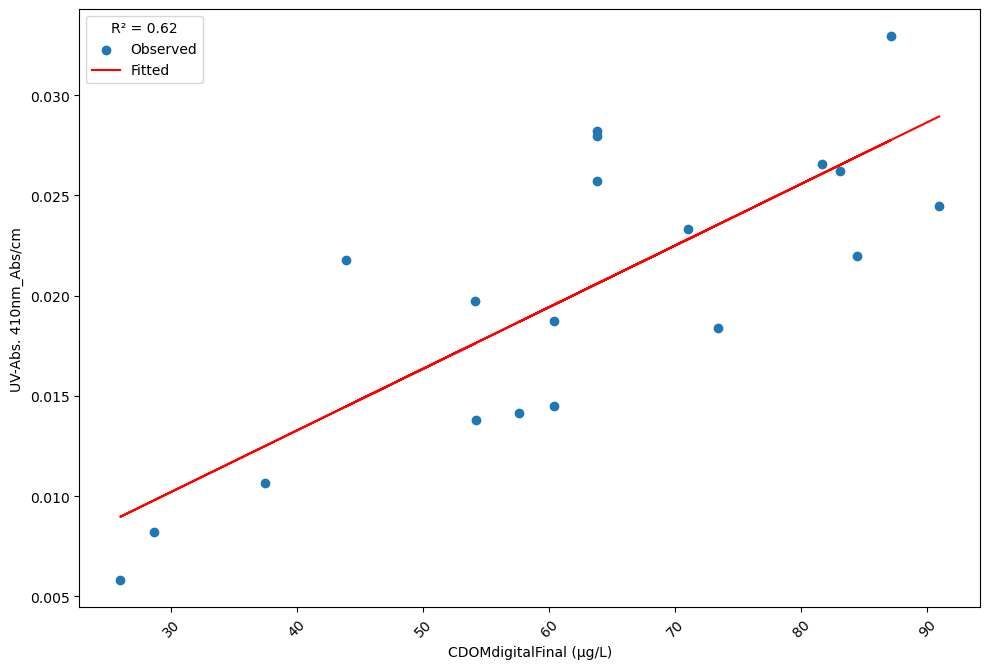

{('UV-Abs. 410nm_Abs/cm', 'CDOMdigitalFinal (µg/L)'): [0.6230266219950673, 0.00030724236022499035, 0.0009867238996005764]}


In [34]:
from matplotlib.backends.backend_pdf import PdfPages
import statsmodels.api as sm

# Assuming merged_df is already created and contains the necessary data

# Variables of interest
wc_var = 'UV-Abs. 410nm_Abs/cm'
sensor_var = 'CDOMdigitalFinal (µg/L)'

# Initialize dictionary to store model coefficients and R-squared values
model_r2_coeffs = {}

with PdfPages('wc_vs_sensor_regressions.pdf') as pdf:
    fig, ax = plt.subplots(figsize=(10, 7))
    
    # Filter the DataFrame for the variables of interest and drop missing values
    df = merged_df[[wc_var, sensor_var]].dropna()
    
    if not df.empty:
        X = sm.add_constant(df[sensor_var])  # independent variable
        y = df[wc_var]  # dependent variable
        
        model = sm.OLS(y, X)
        results = model.fit()
        
        m, c = results.params[sensor_var], results.params['const']
        model_r2_coeffs[(wc_var, sensor_var)] = [results.rsquared, m, c]
        
        ax.scatter(df[sensor_var], df[wc_var], label='Observed')
        ax.plot(df[sensor_var], results.fittedvalues, color='red', label='Fitted')
        ax.set_xlabel(sensor_var)
        ax.set_ylabel(wc_var)
        r2 = results.rsquared
        ax.legend(title=f'R² = {r2:.2f}')
        ax.tick_params(axis='x', rotation=45)  # Rotate x-axis tick labels
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.95)
    
    # Save the figure to the PDF
    pdf.savefig(fig)
    
    plt.show()

print(model_r2_coeffs)
